In [1]:
# Start loading libraries

#! pip install yfinance

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

#! pip install pmdarima
import pmdarima as pm
from pmdarima import model_selection

import scipy
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from arch.unitroot import PhillipsPerron
from arch.unitroot import KPSS

from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
#from statsmodels.graphics.tsaplots import plot_acf

#from matplotlib.ticker import NullFormatter
#import yfinance as yf
#import warnings; warnings.simplefilter('ignore')
#%matplotlib inline

In [2]:
xls_file = pd.ExcelFile("Data_daily_final.xlsx") # Read Excel
df1=xls_file.parse("FCPO") # Read the first sheet (Portfolio holdings)

#df1["Timestamp"] = df1["Date"].astype('datetime64[ns]') # Convert column to date format
df1 = df1.set_index(['Timestamp']) # use first column as index

#df1.to_excel("values.xlsx")  #print to excel


df1.head()

,FCPOc1,FCPOc3,FCPOc6,FCPOc9,FCPOc12,MYR=,MYR3MV=,MYR6MV=,MYR9MV=,MYR1YV=,MYR1YNDFOR= (tää on ndf?),FCPOc1 USD,FCPOc3 USD,FCPOc6 USD,FCPOc9 USD,FCPOc12 USD
Timestamp,,,,,,,,,,,,,,,,
1980-10-23,851.0,890.0,929.0,1013.0,NaN,2.134,NaN,NaN,NaN,NaN,NaN,398.781631,NaN,NaN,NaN,NaN
1980-10-24,839.0,878.0,915.0,988.0,NaN,2.141,NaN,NaN,NaN,NaN,NaN,391.872957,NaN,NaN,NaN,NaN
1980-10-27,853.0,873.0,915.0,985.0,NaN,2.151,NaN,NaN,NaN,NaN,NaN,396.559740,NaN,NaN,NaN,NaN
1980-10-28,849.0,871.0,930.0,978.0,NaN,2.154,NaN,NaN,NaN,NaN,NaN,394.150418,NaN,NaN,NaN,NaN
1980-10-29,862.0,890.0,928.0,978.0,NaN,2.146,NaN,NaN,NaN,NaN,NaN,401.677540,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='Timestamp'>

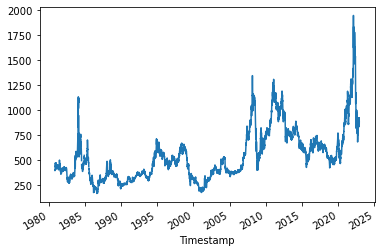

In [16]:
spot = df1["FCPOc1 USD"]

spot = spot[spot != 0]

#spot = np.log(spot).diff()
spot.plot()

In [4]:
#statistics

#mean
#sd
#skewness
#kurtosis
#jb test
#Ljung Box Q(6) and Q^2(6)
#observations

spot.describe()
#spot.dropna().describe()

count    10877.000000
mean       506.945728
std        280.952631
min          0.000000
25%        328.588793
50%        458.481379
75%        647.477745
max       1947.745168
Name: FCPOc1 USD, dtype: float64

In [5]:
print("Skewness spot:", scipy.stats.skew(spot.dropna(), axis=0, bias=True))
print("Skewness logs:", scipy.stats.skew(np.log(spot.dropna()), axis=0, bias=True))
print("Kurtosis spot:", scipy.stats.kurtosis(spot.dropna(), axis=0, fisher=False, bias=True))
print("Kurtosis logs:", scipy.stats.kurtosis(np.log(spot.dropna()), fisher=False, axis=0, bias=True))

print("JB spot:", scipy.stats.jarque_bera(spot.dropna()))
print("JB logs:", scipy.stats.jarque_bera(np.log(spot.dropna())))
#The Jarque-Bera Test is typically used for large datasets (n > 2000) in which other normality tests (like the Shapiro-Wilk test) are unreliable.

print("Q(6) spot:", sm.stats.acorr_ljungbox(spot.dropna(), lags=[6]))
print("Q(6) logs:", sm.stats.acorr_ljungbox(np.log(spot.dropna()), lags=[6]))

Skewness spot: 0.840098530727175
Skewness logs: nan
Kurtosis spot: 4.402708717279316
Kurtosis logs: nan
JB spot: Jarque_beraResult(statistic=2171.1642745136933, pvalue=0.0)
JB logs: Jarque_beraResult(statistic=nan, pvalue=nan)


c:\Users\tatuh\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\tatuh\anaconda3\lib\site-packages\scipy\stats\stats.py:951: RuntimeWarning: invalid value encountered in subtract
  a_zero_mean = a - mean
c:\Users\tatuh\anaconda3\lib\site-packages\scipy\stats\stats.py:1695: RuntimeWarning: invalid value encountered in subtract
  diffx = x - mu


Q(6) spot:         lb_stat  lb_pvalue
6  35565.651485        0.0
Q(6) logs:    lb_stat  lb_pvalue
6      NaN        NaN


c:\Users\tatuh\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\tatuh\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:467: RuntimeWarning: invalid value encountered in subtract
  xo = x - x.mean()


In [6]:
#stationarity

#augmented Dickie-Fuller
#PP test - Phillips and Perron
#KPSS

print("ADF spot:", adfuller(spot.dropna()))
print("ADF logs:", adfuller(np.log(spot.dropna())))

print("PP spot:", PhillipsPerron(spot.dropna()).summary().as_text())
print("PP logs:", PhillipsPerron(np.log(spot.dropna())).summary().as_text())



ADF spot: (-2.975878152177912, 0.037209310792299444, 39, 10837, {'1%': -3.4309535664509574, '5%': -2.861806742736871, '10%': -2.5669119820249677}, 138992.40600205705)


c:\Users\tatuh\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\tatuh\anaconda3\lib\site-packages\numpy\lib\function_base.py:1423: RuntimeWarning: invalid value encountered in subtract
  a = op(a[slice1], a[slice2])


LinAlgError: SVD did not converge

In [ ]:

print("KPSS spot:", KPSS(spot.dropna()).summary().as_text())
print("KPSS logs:", KPSS(np.log(spot.dropna())).summary().as_text())

KPSS spot:     KPSS Stationarity Test Results   
Test Statistic                  9.419
P-value                         0.000
Lags                               56
-------------------------------------

Trend: Constant
Critical Values: 0.74 (1%), 0.46 (5%), 0.35 (10%)
Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root.
KPSS logs:     KPSS Stationarity Test Results   
Test Statistic                 11.546
P-value                         0.000
Lags                               56
-------------------------------------

Trend: Constant
Critical Values: 0.74 (1%), 0.46 (5%), 0.35 (10%)
Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root.


ACF and PACF spot:
ACF and PACF logs:


c:\Users\tatuh\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
c:\Users\tatuh\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


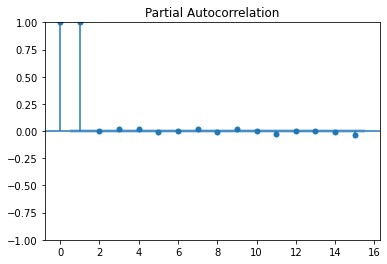

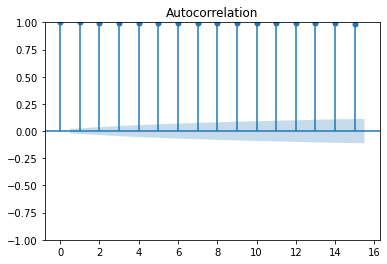

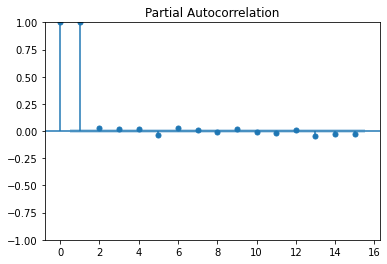

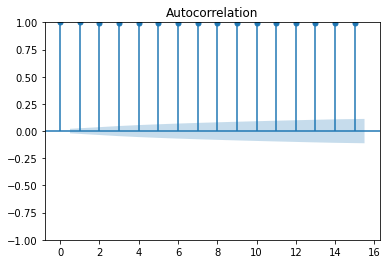

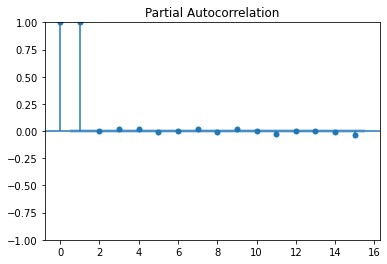

In [ ]:
#ACF and PACF

print("ACF and PACF spot:")
plot_acf(spot.dropna(), lags = 15)
plot_pacf(spot.dropna(), lags = 15)


print("ACF and PACF logs:")
plot_acf(np.log(spot.dropna()), lags = 15)
plot_pacf(np.log(spot.dropna()), lags = 15)



0.6782943507735172

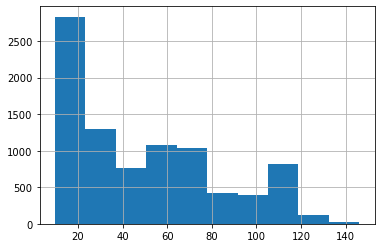

In [ ]:
spot.hist()
0.6782943507735172

<AxesSubplot:>

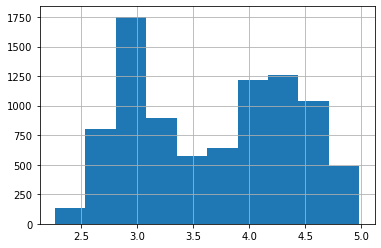

In [ ]:
np.log(spot).hist()

In [ ]:
# Load the data and split it into separate pieces
data = np.array(spot.dropna())
train, test = model_selection.train_test_split(data, train_size=6000)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=17580.526, Time=0.70 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=17583.809, Time=0.09 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=17573.675, Time=0.28 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=17573.208, Time=0.35 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=17583.207, Time=0.09 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=17574.406, Time=0.48 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=17573.519, Time=0.45 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=17577.204, Time=0.60 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=17572.748, Time=0.15 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=17573.955, Time=0.25 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=17573.110, Time=0.23 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=17573.203, Time=0.12 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=17576.745, Time=0.32 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 4.107 seconds


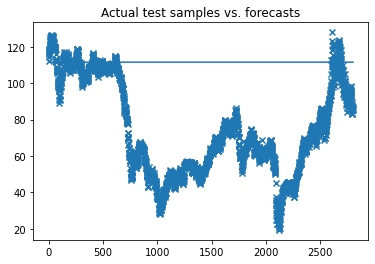

In [ ]:
# Fit a simple auto_arima model
arima = pm.auto_arima(train, error_action='ignore', trace=True,
                      suppress_warnings=True, maxiter=5,
                      seasonal=False)

#arima = pm.auto_arima(train, error_action='ignore', trace=True,
                      #suppress_warnings=True, maxiter=5,
                      #seasonal=True, m=12)

# #############################################################################
# Plot actual test vs. forecasts:
x = np.arange(test.shape[0])
plt.scatter(x, test, marker='x')
plt.plot(x, arima.predict(n_periods=test.shape[0]))
plt.title('Actual test samples vs. forecasts')
plt.show()

In [ ]:
arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 6000
Model:               SARIMAX(0, 1, 1)   Log Likelihood               -8784.374
Date:                Tue, 20 Dec 2022   AIC                          17572.748
Time:                        20:20:17   BIC                          17586.147
Sample:                             0   HQIC                         17577.401
                               - 6000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0464      0.006     -7.292      0.000      -0.059      -0.034
sigma2         1.0950      0.007    148.890      0.000       1.081       1.109
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             41956.77
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               9.67   Skew:                            -0.54
Prob(H) (two-sided):                  0.00   Kurtosis:                        15.91
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

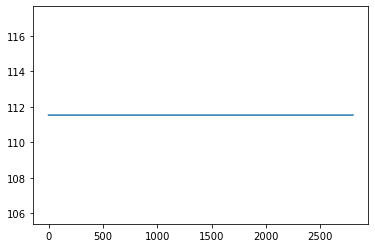

In [ ]:
plt.plot(x, arima.predict(n_periods=test.shape[0]))

In [ ]:
arima.predict(n_periods=test.shape[0])

array([111.53265899, 111.53265899, 111.53265899, ..., 111.53265899,
       111.53265899, 111.53265899])

<AxesSubplot:xlabel='Timestamp'>

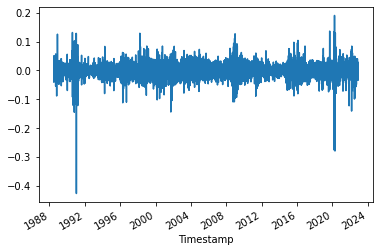

In [ ]:
spot2 = np.log(spot).diff()
spot2.plot()

In [ ]:
#statistics

#mean
#sd
#skewness
#kurtosis
#jb test
#Ljung Box Q(6) and Q^2(6)
#observations

spot2.describe()
#spot.dropna().describe()

count    8798.000000
mean        0.000199
std         0.023175
min        -0.427223
25%        -0.010392
50%         0.000892
75%         0.011404
max         0.190774
Name: LCOc1, dtype: float64

In [ ]:
print("Skewness spot:", scipy.stats.skew(spot2.dropna(), axis=0, bias=True))
#print("Skewness logs:", scipy.stats.skew(np.log(spot2.dropna()), axis=0, bias=True))
print("Kurtosis spot:", scipy.stats.kurtosis(spot2.dropna(), axis=0, fisher=False, bias=True))
#print("Kurtosis logs:", scipy.stats.kurtosis(np.log(spot2.dropna()), fisher=False, axis=0, bias=True))

print("JB spot:", scipy.stats.jarque_bera(spot2.dropna()))
#print("JB logs:", scipy.stats.jarque_bera(np.log(spot2.dropna())))
#The Jarque-Bera Test is typically used for large datasets (n > 2000) in which other normality tests (like the Shapiro-Wilk test) are unreliable.

print("Q(6) spot:", sm.stats.acorr_ljungbox(spot2.dropna(), lags=[6]))
#print("Q(6) logs:", sm.stats.acorr_ljungbox(np.log(spot2.dropna()), lags=[6]))

Skewness spot: -1.1756743378526027
Kurtosis spot: 24.89743972595605
JB spot: Jarque_beraResult(statistic=177802.70706149802, pvalue=0.0)
Q(6) spot:      lb_stat  lb_pvalue
6  13.848959    0.03137


In [ ]:
#stationarity

#augmented Dickie-Fuller
#PP test - Phillips and Perron
#KPSS

print("ADF spot:", adfuller(spot2.dropna()))
#print("ADF logs:", adfuller(np.log(spot2.dropna())))

print("PP spot:", PhillipsPerron(spot2.dropna()).summary().as_text())
#print("PP logs:", PhillipsPerron(np.log(spot2.dropna())).summary().as_text())

ADF spot: (-17.811390604216715, 3.1881586433632614e-30, 22, 8775, {'1%': -3.43109543748901, '5%': -2.8618694339632045, '10%': -2.56694535271954}, -41123.23511645063)
PP spot:      Phillips-Perron Test (Z-tau)    
Test Statistic                -94.449
P-value                         0.000
Lags                               37
-------------------------------------

Trend: Constant
Critical Values: -3.43 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [ ]:
print("KPSS spot:", KPSS(spot2.dropna()).summary().as_text())
#print("KPSS logs:", KPSS(np.log(spot2.dropna())).summary().as_text())

KPSS spot:     KPSS Stationarity Test Results   
Test Statistic                  0.043
P-value                         0.915
Lags                               14
-------------------------------------

Trend: Constant
Critical Values: 0.74 (1%), 0.46 (5%), 0.35 (10%)
Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root.


ACF and PACF spot:


c:\Users\tatuh\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


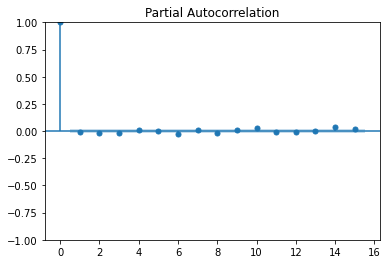

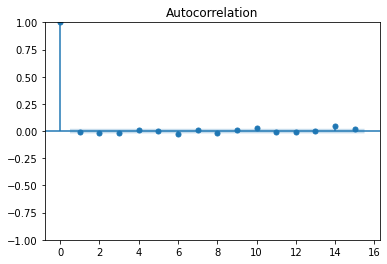

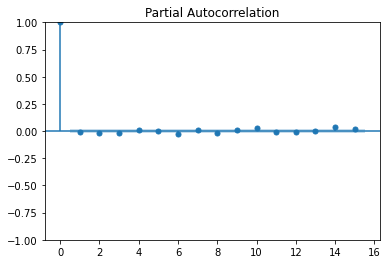

In [ ]:
#ACF and PACF

print("ACF and PACF spot:")
plot_acf(spot2.dropna(), lags = 15)
plot_pacf(spot2.dropna(), lags = 15)


#print("ACF and PACF logs:")
#plot_acf(np.log(spot2.dropna()), lags = 15)
#plot_pacf(np.log(spot2.dropna()), lags = 15)


<AxesSubplot:>

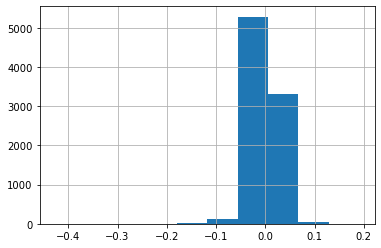

In [ ]:
spot2.hist()


In [ ]:
# Load the data and split it into separate pieces
data2 = np.array(spot2.dropna())
train2, test2 = model_selection.train_test_split(data2, train_size=6000)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-28320.305, Time=0.28 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-28315.582, Time=0.20 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-28314.579, Time=0.36 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-28314.647, Time=0.30 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-28323.029, Time=0.29 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=-28319.188, Time=0.58 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-28311.999, Time=0.27 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=-28319.702, Time=0.78 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=-28321.500, Time=0.72 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-28320.536, Time=0.37 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=-28318.797, Time=0.54 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-28322.755, Time=1.43 sec

Best model:  ARIMA(1,0,2)(0,0,0)[0]          
Total fit time: 6.109 seconds


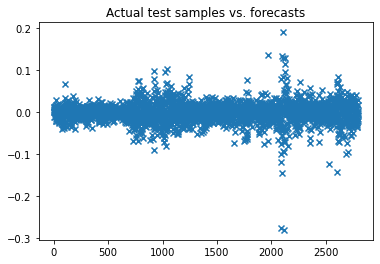

In [ ]:
# Fit a simple auto_arima model
arima2 = pm.auto_arima(train2, error_action='ignore', trace=True,
                      suppress_warnings=True, maxiter=5,
                      seasonal=False)

#arima = pm.auto_arima(train, error_action='ignore', trace=True,
                      #suppress_warnings=True, maxiter=5,
                      #seasonal=True, m=12)

# #############################################################################
# Plot actual test vs. forecasts:
x2 = np.arange(test2.shape[0])
plt.scatter(x2, test2, marker='x')
plt.plot(x2, arima2.predict(n_periods=test2.shape[0]))
plt.title('Actual test samples vs. forecasts')
plt.show()

In [ ]:
arima2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 6000
Model:               SARIMAX(1, 0, 2)   Log Likelihood               14165.515
Date:                Tue, 20 Dec 2022   AIC                         -28323.029
Time:                        20:33:17   BIC                         -28296.231
Sample:                             0   HQIC                        -28313.723
                               - 6000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5847      0.150      3.910      0.000       0.292       0.878
ma.L1         -0.5991      0.149     -4.009      0.000      -0.892      -0.306
ma.L2         -0.0248      0.011     -2.289      0.022      -0.046      -0.004
sigma2         0.0005      3e-06    173.590      0.000       0.001       0.001
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):            141167.57
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               0.97   Skew:                            -1.28
Prob(H) (two-sided):                  0.52   Kurtosis:                        26.63
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

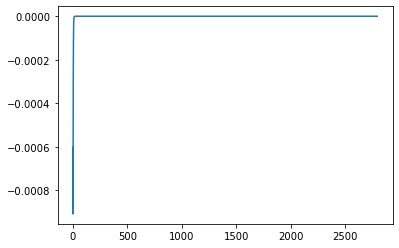

In [ ]:
plt.plot(x2, arima2.predict(n_periods=test2.shape[0]))

In [ ]:
arima2.predict(n_periods=test2.shape[0])

array([-6.02744470e-004, -9.07725988e-004, -5.30708584e-004, ...,
       -4.94065646e-324, -4.94065646e-324, -4.94065646e-324])

In [ ]:
#cointegration tests

#normalized cv
#LR test

In [ ]:
#correlaatiomatriisi

In [ ]:
#np.argwhere(np.isnan(x))